## Image classification using the CIFAR-10 dataset

**Author: Oscar Miranda**

Useful references and sources:

https://www.kaggle.com/c/cifar-10

https://keras.io/examples/vision/metric_learning/

https://www.kaggle.com/roblexnana/cifar10-with-cnn-for-beginer


# Part 1: Designing and using CNN model

## Part 1.1: Setup

### Import Needed Resources / Libraries

In [ ]:
from __future__ import print_function
from tensorflow import keras
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import itertools

%matplotlib inline

import random

import tensorflow as tf
from collections import defaultdict
from PIL import Image
from sklearn.metrics import ConfusionMatrixDisplay

### Load and prepare the data

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the image data
x_train = x_train.astype("float32") / 255.0
y_train = np.squeeze(y_train)
x_test = x_test.astype("float32") / 255.0
y_test = np.squeeze(y_test)

170498071/170498071 [==============================] - 6s 0us/step


## Part 1.2: Examine Data

In [ ]:
# Number of samples
print("Number of training sample: ",y_train.shape[0])
print("Number of test samples: ", y_test.shape[0])

Number of training sample:  50000
Number of test samples:  10000


In [ ]:
# Number of classes
num_classes = max(y_test)+1
print(num_classes)

10


In [ ]:
# Shape of image data
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


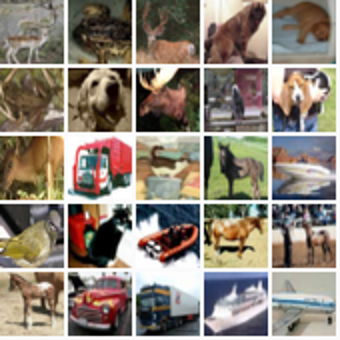

In [ ]:
# Show collage of 25 (randomly selected) images

height_width = 32


def show_collage(examples):
    box_size = height_width + 2
    num_rows, num_cols = examples.shape[:2]

    collage = Image.new(
        mode="RGB",
        size=(num_cols * box_size, num_rows * box_size),
        color=(250, 250, 250),
    )
    for row_idx in range(num_rows):
        for col_idx in range(num_cols):
            array = (np.array(examples[row_idx, col_idx]) * 255).astype(np.uint8)
            collage.paste(
                Image.fromarray(array), (col_idx * box_size, row_idx * box_size)
            )

    # Double size for visualisation.
    collage = collage.resize((2 * num_cols * box_size, 2 * num_rows * box_size))
    return collage


# Show a collage of 5x5 random images.
sample_idxs = np.random.randint(0, 50000, size=(5, 5))
examples = x_train[sample_idxs]
show_collage(examples)

In [ ]:
idx = y_train[0]
print(idx)

6


In [ ]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [ ]:
labels[idx]

'Frog'

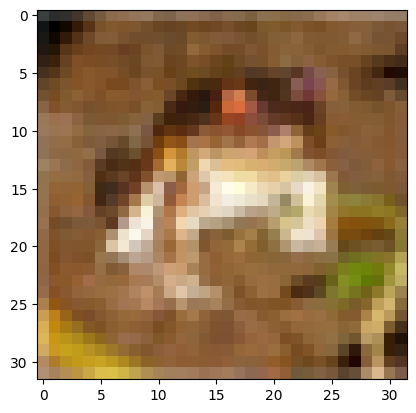

In [ ]:
plt.imshow(x_train[0])

In [ ]:
# Convert class vectors to binary class matrices.
# This is called one-hot encoding.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

## **Part 1.3: Design and configure model** *(CNN)*

In this part we will use a convolutional neural network (CNN) built from scratch.


In [ ]:
batch_size = 128
epochs = 10
data_augmentation = False

In [ ]:
#define the convnet
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTEN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                        

In [ ]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

## **Part 1.4: Train the model**

In [ ]:
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/10
391/391 [==============================] - 16s 17ms/step - loss: 1.9881 - accuracy: 0.2697 - val_loss: 1.7722 - val_accuracy: 0.3711
Epoch 2/10
391/391 [==============================] - 5s 14ms/step - loss: 1.6951 - accuracy: 0.3882 - val_loss: 1.5856 - val_accuracy: 0.4328
Epoch 3/10
391/391 [==============================] - 5s 14ms/step - loss: 1.5622 - accuracy: 0.4331 - val_loss: 1.4544 - val_accuracy: 0.4771
Epoch 4/10
391/391 [==============================] - 5s 13ms/step - loss: 1.4795 - accuracy: 0.4641 - val_loss: 1.3749 - val_accuracy: 0.5112
Epoch 5/10
391/391 [==============================] - 5s 14ms/step - loss: 1.4200 - accuracy: 0.4887 - val_loss: 1.3210 - val_accuracy: 0.5339
Epoch 6/10
391/391 [==============================] - 5s 13ms/step - loss: 1.3678 - accuracy: 0.5114 - val_loss: 1.3343 - val_accuracy: 0.5247
Epoch 7/10
391/391 [==============================] - 5s 14ms/step - loss: 1.3203 - accuracy: 0.5264 - val_loss: 1.2352 - val_accuracy: 0.563

In [ ]:
def plotmodelhistory(history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


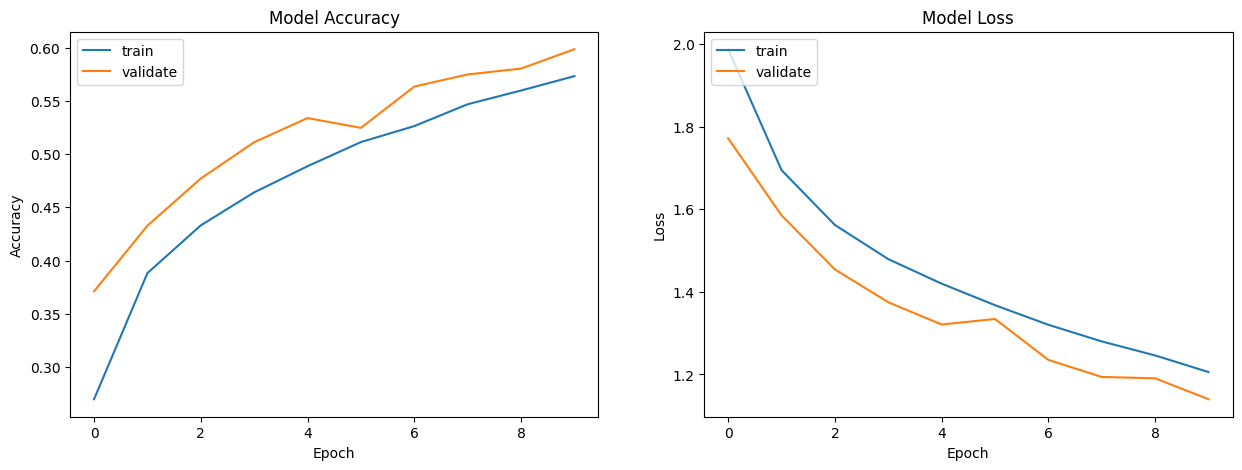

In [ ]:
plotmodelhistory(history)

## **Part 1.5: Evaluate the model**

In [ ]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.1399 - accuracy: 0.5986
Test loss: 1.1399322748184204
Test accuracy: 0.5985999703407288
313/313 [==============================] - 1s 2ms/step


In [ ]:
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    """
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

    return im, cbar

def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    """
    A function to annotate a heatmap.
    """
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > thresh else "black")
            texts.append(text)

    return texts

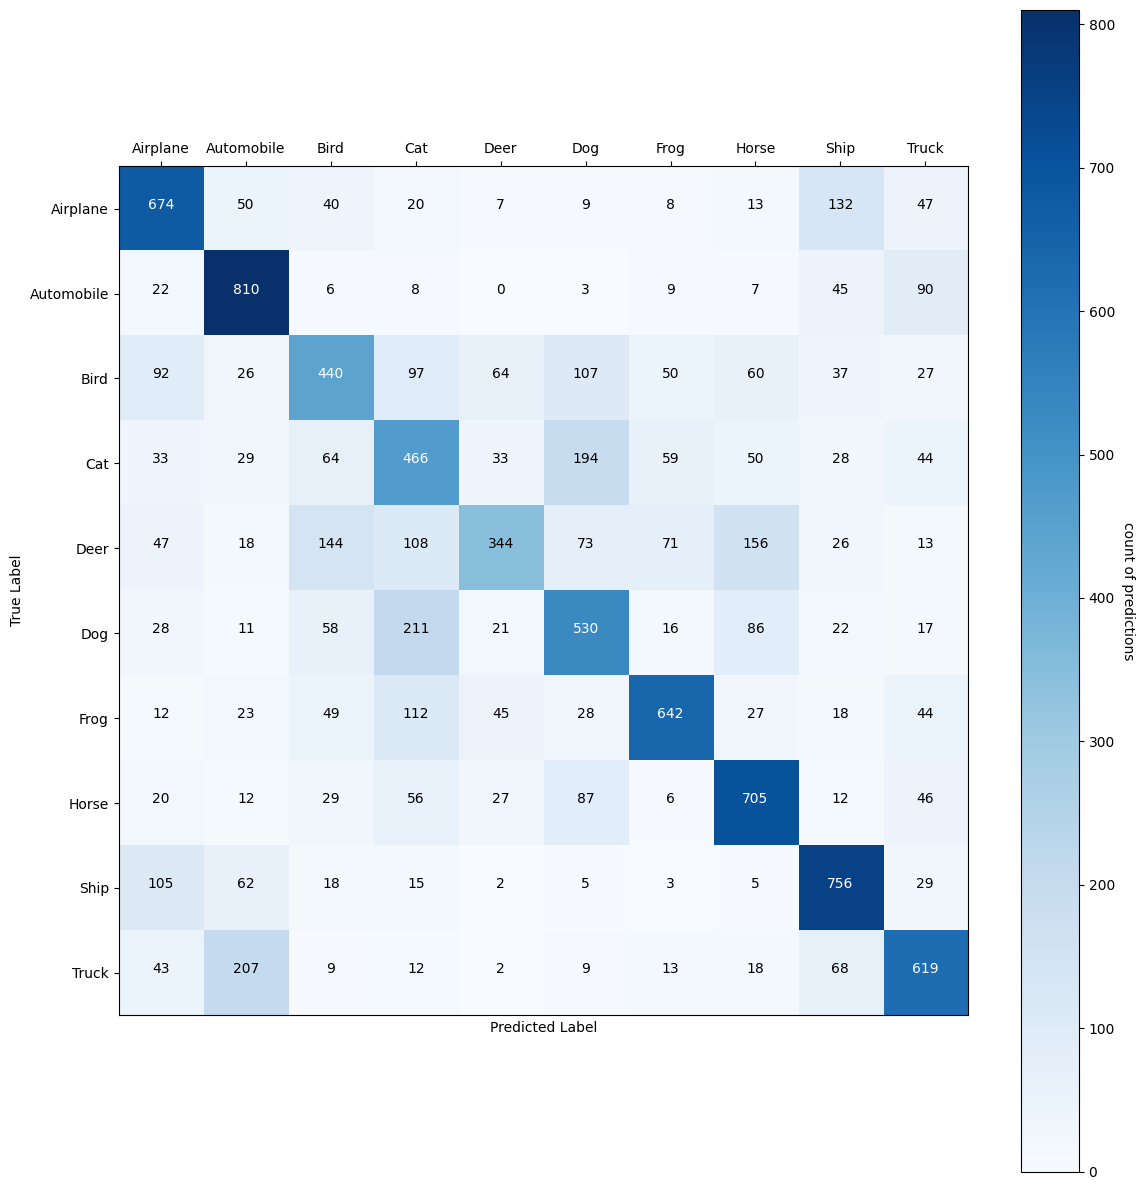

In [ ]:
# Plot confusion matrix

# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = x_test[errors]

cm = confusion_matrix(Y_true, Y_pred_classes)
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(12,12))
im, cbar = heatmap(cm, labels, labels, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()

In [ ]:
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.63      0.67      0.65      1000
           1       0.65      0.81      0.72      1000
           2       0.51      0.44      0.47      1000
           3       0.42      0.47      0.44      1000
           4       0.63      0.34      0.45      1000
           5       0.51      0.53      0.52      1000
           6       0.73      0.64      0.68      1000
           7       0.63      0.70      0.66      1000
           8       0.66      0.76      0.71      1000
           9       0.63      0.62      0.63      1000

    accuracy                           0.60     10000
   macro avg       0.60      0.60      0.59     10000
weighted avg       0.60      0.60      0.59     10000



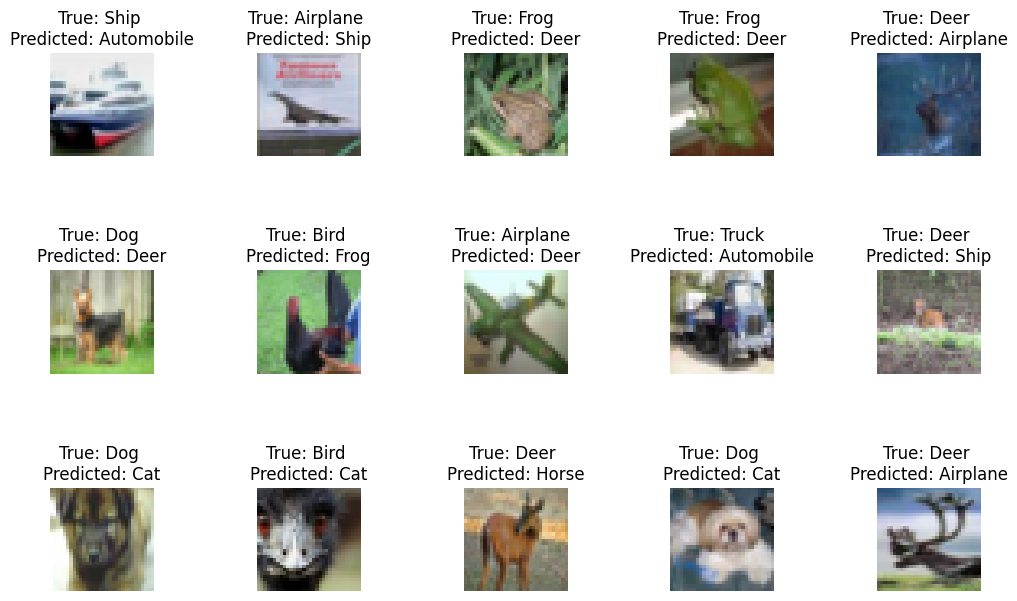

In [ ]:
# Inspect errors
R = 3
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,8))
axes = axes.ravel()

misclassified_idx = np.where(Y_pred_classes != Y_true)[0]
for i in np.arange(0, R*C):
    axes[i].imshow(x_test[misclassified_idx[i]])
    axes[i].set_title("True: %s \nPredicted: %s" % (labels[Y_true[misclassified_idx[i]]],
                                                  labels[Y_pred_classes[misclassified_idx[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [ ]:
def show_test(number):
    fig = plt.figure(figsize = (3,3))
    test_image = np.expand_dims(x_test[number], axis=0)
    predict_x=model.predict(test_image)
    test_result=np.argmax(predict_x,axis=1)
    plt.imshow(x_test[number])
    dict_key = test_result[0]
    plt.title("Predicted: {} \nTrue Label: {}".format(labels[dict_key],
                                                      labels[Y_true[number]]))

1/1 [==============================] - 0s 156ms/step


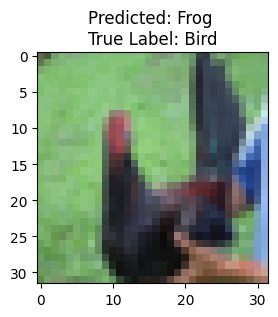

In [ ]:
show_test(25)

## **PART 1** - *Your Turn*

### **Part 1 - Tasks:**

**1.1  &emsp;(*required*) - 10 points each**

 &emsp;**1.1.1** Is the dataset balanced?

 &emsp;**1.1.2** Does your model suffer from overfitting? If so, what would you suggest doing about it?

 &emsp;**1.1.3** Is accuracy a good metric of success in this case? Why (not)?

  &emsp;**1.1.4** What is the baseline accuracy for this dataset/problem?

**1.2 &emsp;(*optional*) - 15 bonus points**

 Write code to try different combinations of:

 - numbers of hidden layers and units per layer

 - loss functions

 - activation functions

 Please refrain from using better architectures (Vision Transformers, etc.) but feel free to use "advanced" techniques to curb overfitting (e.g., dropout, batch normalization, weight regularization, etc.)

#### **Part 1.1 - Required Tasks:**   *(responses)*

 **1.1.1**

   >Is the dataset balanced?

 Yes the dataset is balanced, each class has 5,000 images in the training set and 1,000 images in the test set. We can demonstrate this with the code below and plot it.

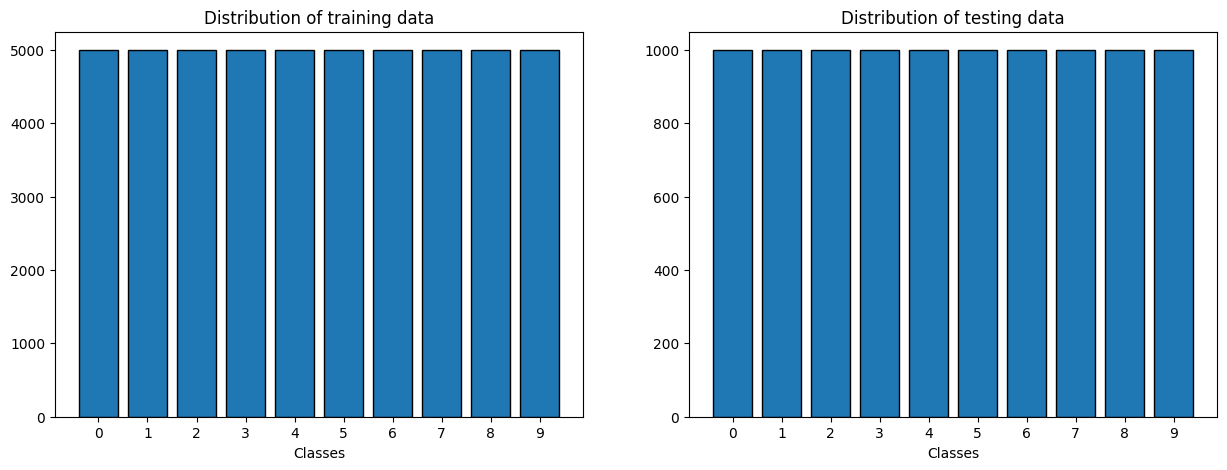

Unique classes in training set: [0 1 2 3 4 5 6 7 8 9]
Unique classes in test set: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# imports
import matplotlib.pyplot as plt

# Convert one-hot encoded y_train and y_test back to class labels
y_train_classes = np.argmax(y_train, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# using matplotlib
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Histogram for training set
axs[0].hist(y_train_classes, bins=np.arange(num_classes+1)-0.5, rwidth=0.8, edgecolor='black')
axs[0].set_title('Distribution of training data')
axs[0].set_xlabel('Classes')
axs[0].set_xticks(np.arange(num_classes))

# Histogram for testing set
axs[1].hist(y_test_classes, bins=np.arange(num_classes+1)-0.5, rwidth=0.8, edgecolor='black')
axs[1].set_title('Distribution of testing data')
axs[1].set_xlabel('Classes')
axs[1].set_xticks(np.arange(num_classes))

plt.show()

print('Unique classes in training set:', np.unique(y_train_classes))
print('Unique classes in test set:', np.unique(y_test_classes))

 **1.1.2**
 > Does your model suffer from overfitting? If so, what would you suggest
doing about it?

 No the model does not suffer from overfitting it suffers from underfitting. Possibly training for more epochs could allow for the model to learn more complex patterns.

 **1.1.3**
 > Is accuracy a good metric of success in this case? Why (not)?

 Accuracy is a good and useful metric in this case because we have a balanced dataset which means that each class is equally represented.

 **1.1.4**
 > What is the baseline accuracy for this dataset/problem?

 CIFAR-10 dataset has 10 classes that have equal representation which means that the baseline accuracy is 10% if we just guess a class for each image. So, any model that has better accuracy than 10% is doing better than just simply guessing.

# **Part 2: Transfer Learning**

## **Part 2.1: Setup**

In [ ]:
from keras import Sequential
from keras.applications import ResNet50
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from keras.utils import to_categorical

In [ ]:
#Import dataset (again)
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)

In [ ]:
#Print the dimensions of the datasets to make sure everything's kosher

print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 1))
((15000, 32, 32, 3), (15000, 1))
((10000, 32, 32, 3), (10000, 1))


In [ ]:
#One hot encode the labels.Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10

y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [ ]:
# Lets print the dimensions one more time to see if things changed the way we expected

print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))


## **Part 2.2: Using ResNet50 as a base model**

Learn more about ResNet50 at: https://www.kaggle.com/keras/resnet50

In [ ]:
base_model_1 = ResNet50(include_top=False,
                        weights='imagenet',
                        input_shape=(32,32,3),
                        classes=y_train.shape[1])

model_1=Sequential()
#Add the Dense layers along with activation and batch normalization
model_1.add(base_model_1)
model_1.add(Flatten())

#Add the Dense layers along with activation and batch normalization
model_1.add(Dense(4000,activation=('relu'),input_dim=512))
model_1.add(Dense(2000,activation=('relu')))
model_1.add(Dense(1000,activation=('relu')))
model_1.add(Dense(500,activation=('relu')))
model_1.add(Dense(10,activation=('softmax'))) #This is the classification layer

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 4000)              8196000   
                                                                 
 dense_3 (Dense)             (None, 2000)              8002000   
                                                                 
 dense_4 (Dense)             (None, 1000)              2001000   
                                                                 
 dense_5 (Dense)             (None, 500)               500500    
                                                                 
 dense_6 (Dense)             (None, 10)               

In [ ]:
batch_size= 128
epochs=10
learn_rate=.03

sgd=SGD(learning_rate=learn_rate,momentum=.9,nesterov=False)
adam=Adam(learning_rate=learn_rate)

In [ ]:
# Compile the model
model_1.compile(optimizer=sgd,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# Train the model
history_1 = model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose = 1,
              validation_data=(x_val, y_val),
              shuffle=True)

Epoch 1/10
274/274 [==============================] - 30s 82ms/step - loss: 1.2723 - accuracy: 0.5603 - val_loss: 1.5973 - val_accuracy: 0.5130
Epoch 2/10
274/274 [==============================] - 20s 72ms/step - loss: 0.8092 - accuracy: 0.7319 - val_loss: 0.9841 - val_accuracy: 0.6709
Epoch 3/10
274/274 [==============================] - 19s 71ms/step - loss: 0.6388 - accuracy: 0.7874 - val_loss: 1.2550 - val_accuracy: 0.6294
Epoch 4/10
274/274 [==============================] - 20s 71ms/step - loss: 0.5109 - accuracy: 0.8295 - val_loss: 0.8451 - val_accuracy: 0.7333
Epoch 5/10
274/274 [==============================] - 20s 73ms/step - loss: 0.4310 - accuracy: 0.8575 - val_loss: 1.5275 - val_accuracy: 0.5975
Epoch 6/10
274/274 [==============================] - 19s 70ms/step - loss: 0.3562 - accuracy: 0.8824 - val_loss: 0.9569 - val_accuracy: 0.7093
Epoch 7/10
274/274 [==============================] - 20s 73ms/step - loss: 0.3040 - accuracy: 0.8999 - val_loss: 1.4375 - val_accuracy:

In [ ]:
def plotmodelhistory(history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history_1.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


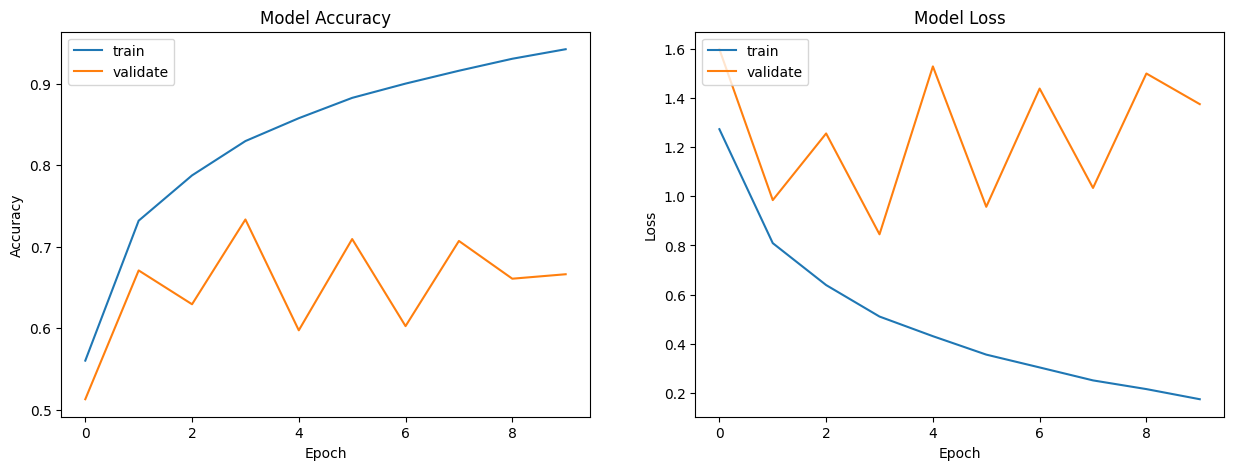

In [ ]:
plotmodelhistory(history_1)

In [ ]:
# Score trained model.
scores = model_1.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model_1.predict(x_test)

313/313 [==============================] - 5s 13ms/step - loss: 1.3478 - accuracy: 0.6704
Test loss: 1.3478368520736694
Test accuracy: 0.6704000234603882
313/313 [==============================] - 4s 9ms/step


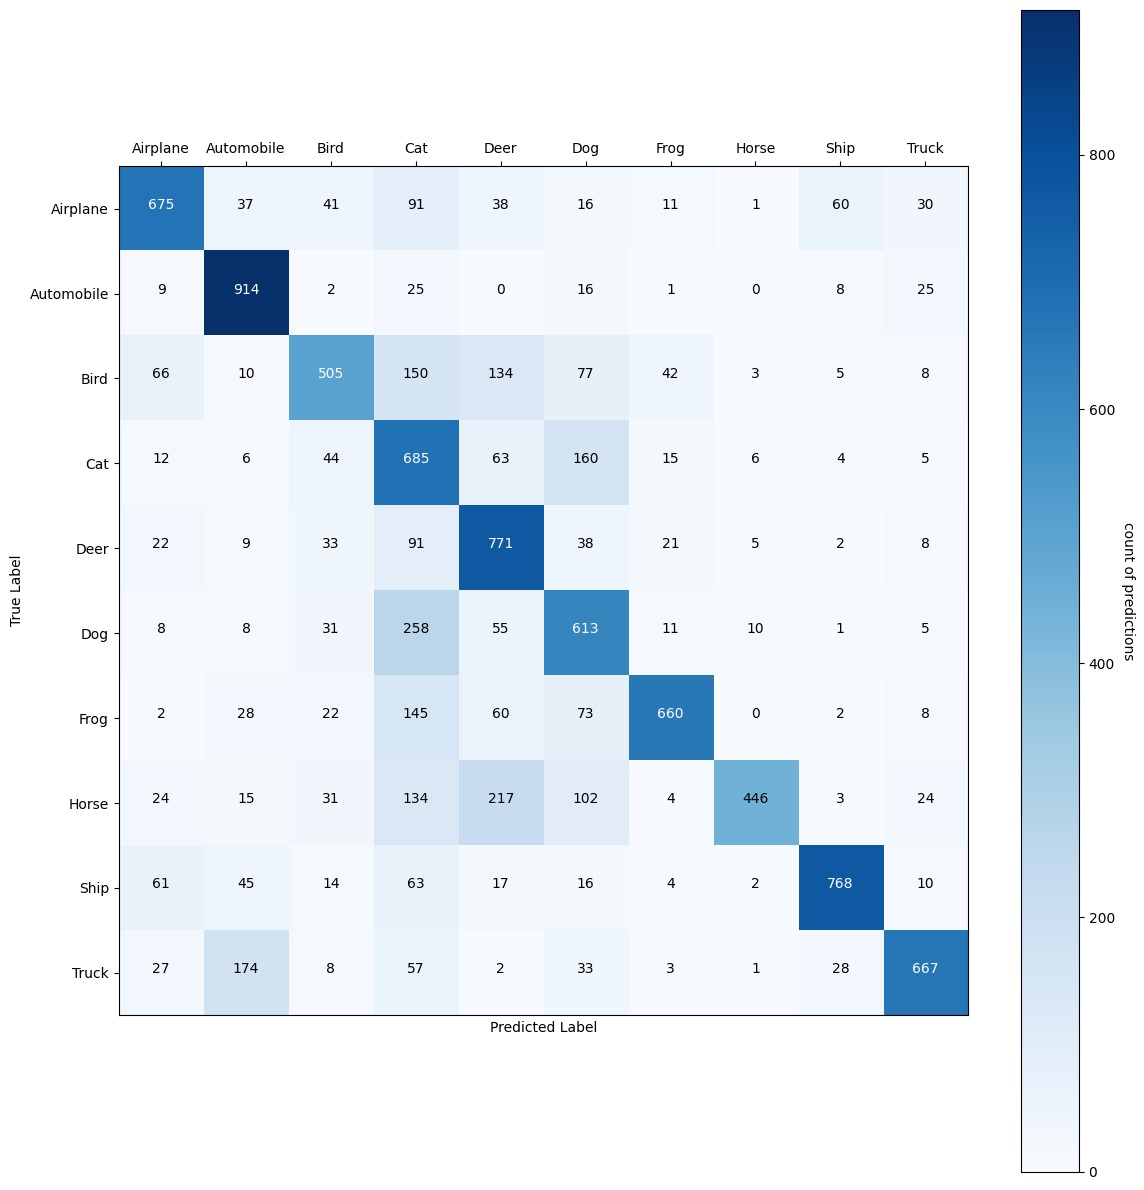

In [ ]:
# Plot confusion matrix

# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = x_test[errors]

cm = confusion_matrix(Y_true, Y_pred_classes)
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(12,12))
im, cbar = heatmap(cm, labels, labels, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()

## **Part 2.3**










### **Part 2.3.1**

*   Use a different base model, e.g., VGG19 (see https://www.kaggle.com/keras/vgg19)
*   Add Dropout layers
*   Use data augmentation
*   Change optimizer
*   Change other hyperparameters (learning rate, batch size, etc.)

#### **Model 2** *VGG19 with dropout*

80134624/80134624 [==============================] - 3s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 1024)              525312    
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 dense_8 (Dense)             (None, 512)               524800    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                       

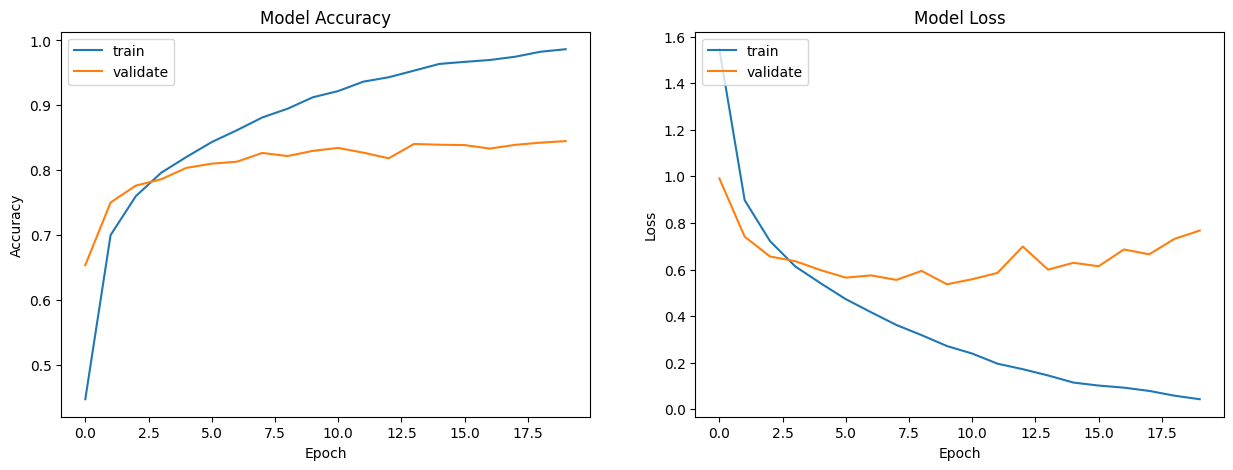

313/313 [==============================] - 4s 11ms/step - loss: 0.7782 - accuracy: 0.8428
Test loss: 0.7781878113746643
Test accuracy: 0.8428000211715698


In [ ]:
from keras.applications import VGG19
from keras.layers import Dropout

# the data is normalized
x_train = x_train.astype('float32') / 255
x_val = x_val.astype('float32') / 255
x_test = x_test.astype('float32') / 255

base_model_2 = VGG19(include_top=False,
                     weights='imagenet',
                     input_shape=(32,32,3),
                     classes=y_train.shape[1])

model_2 = Sequential()

model_2.add(base_model_2)
model_2.add(Flatten())
model_2.add(Dense(1024, activation='relu'))
model_2.add(Dropout(0.5)) # Add dropout of 0.5
model_2.add(Dense(512, activation='relu'))
model_2.add(Dropout(0.5)) # Add dropout of 0.5
model_2.add(Dense(10, activation='softmax'))

model_2.summary()

batch_size_2 = 100
epochs_2 = 20
learn_rate_2 = .001

sgd_2 = SGD(learning_rate=learn_rate_2, momentum=.9, nesterov=False)
adam_2 = Adam(learning_rate=learn_rate_2)

model_2.compile(optimizer=sgd_2,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history_2 = model_2.fit(x_train, y_train,
              batch_size=batch_size_2,
              epochs=epochs_2,
              verbose = 1,
              validation_data=(x_val, y_val),
              shuffle=True)

print(history_2.history.keys())
plotmodelhistory(history_2)

scores_2 = model_2.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores_2[0])
print('Test accuracy:', scores_2[1])


#### **Model 3** *VGG16 with data augmentation*

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 1024)              525312    
                                                                 
 dense_14 (Dense)            (None, 512)               524800    
                                                                 
 dense_15 (Dense)            (None, 10)                5130      
                                                                 
Total params: 15,769,930
Trainable params: 15,769,930
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
350/350 [======================

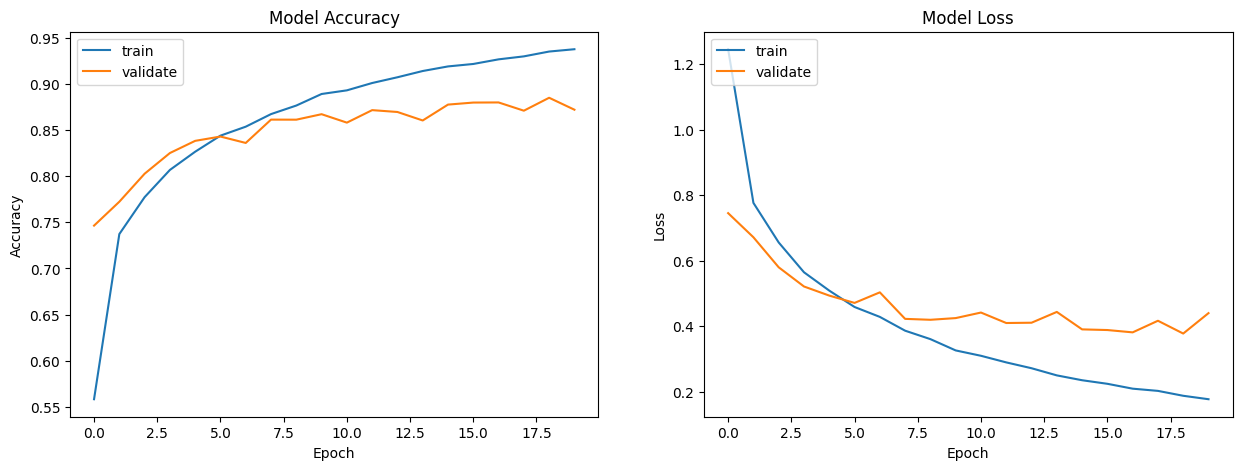

313/313 [==============================] - 3s 9ms/step - loss: 0.4512 - accuracy: 0.8709
Test loss: 0.45115169882774353
Test accuracy: 0.8708999752998352


In [ ]:
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator

# Create a data generator
datagen = ImageDataGenerator(
  rotation_range=15,
  width_shift_range=0.1,
  height_shift_range=0.1,
  horizontal_flip=True,
  )
datagen.fit(x_train)

base_model_3 = VGG16(include_top=False,
                     weights='imagenet',
                     input_shape=(32,32,3),
                     classes=y_train.shape[1])

model_3 = Sequential()

model_3.add(base_model_3)
model_3.add(Flatten())
model_3.add(Dense(1024, activation=('relu')))
model_3.add(Dense(512, activation=('relu')))
model_3.add(Dense(10, activation=('softmax')))

model_3.summary()

batch_size_3 = 100
epochs_3 = 20
learn_rate_3 = .01

sgd_3 = SGD(learning_rate=learn_rate_3, momentum=.9, nesterov=False)
adam_3 = Adam(learning_rate=learn_rate_3)

model_3.compile(optimizer=sgd_3,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# fit the model with the augmented data
history_3 = model_3.fit(datagen.flow(x_train, y_train, batch_size=batch_size_3),
                                  steps_per_epoch = len(x_train) / batch_size_3,
                                  epochs=epochs_3,
                                  verbose = 1,
                                  validation_data=(x_val, y_val),
                                  shuffle=True)

print(history_3.history.keys())
plotmodelhistory(history_3)

scores_3 = model_3.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores_3[0])
print('Test accuracy:', scores_3[1])


### Summary table of results


| Method | Test accuracy | Remarks |
| --- | --- | --- |
| (Part 1) Baseline CNN designed from scratch | 0.598 | Low accuracy indicating that the model is underfitting. |
| (Part 2 - Model 1) Transfer learning using pre-trained CNN (ResNet50) | 0.670 | Improvement over baseline model. Possible signs of overfitting. |
| (Part 2 - Model 2) VGG19 with dropout | 0.842 | Better. The addition of dropout layers might have helped the model to prevent overfitting. |
| (Part 2 - Model 3) VGG16 with data augmentation | 0.870 | Highest accuracy. Data augmentation likely helped by providing more varied training examples |


### Conclusions

Write your conclusions here.

In our experiments I found that transfer learning significantly improves the performance over the baseline Convolutional Neural Network (CNN) that was designed from scratch. Using transfer learning is effective because we capitalize on pre-existing knowledge from models that have been trained on larger datasets. It also reduces the computational resources required.

We also observed that striking a balance between model complexity and the risk of overfitting is crucial. In the case of the ResNet50, the model's complexity seemed to be too high for our specific task and for our relatively simple CIFAR-10 dataset thus the model tended to overfit. ResNet50 is a powerful model but it proved not to be the best choice for this specific task.

I then attempted to use the VGG19 model with the incorporation of dropout layers somewhat alleviated the issues experienced by ResNet50.

Interestingly, the VGG16 model with data augmentation, offered the best performance. Data augmentation enhances the variety of the training data by generating modified versions of the images using transformations like rotation, scaling, and flipping. This helped the model's ability to generalize which lead to a reduction in overfitting and improved performance.